# Insurance Charges Prediction Model

Problem Statement- 
* By understanding the patterns in this data set we can gain useful insight into how age,gender and lifestyle choices can affect a person's insurance premiums. This could be of great value when setting up an insurance plan or marketing campaigns that target certain demographics. Furthermore, this dataset provides us with an opportunity to explore deeper questions such as what are some possible solutions for increasing affordability when it comes to dealing with high charges for certain groups?

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

## Data Collection and Cleaning

source = https://www.kaggle.com/datasets/thedevastator/prediction-of-insurance-charges-using-age-gender

In [3]:
# Importing the Dataset
df = pd.read_csv('insurance.csv')

In [4]:
# Basic Exploration within this data
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values present in this dataset hence no need to clean it.

## Exploratory Data Analysis

In [9]:
df.columns.nunique()

7

In [10]:
for i in df.columns:
    print ("Column_name = {}, No. of Unique values = {}".format(i,df[i].nunique()))

Column_name = age, No. of Unique values = 47
Column_name = sex, No. of Unique values = 2
Column_name = bmi, No. of Unique values = 548
Column_name = children, No. of Unique values = 6
Column_name = smoker, No. of Unique values = 2
Column_name = region, No. of Unique values = 4
Column_name = charges, No. of Unique values = 1337


In [11]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


### 1. On which gender has more premium charges ?

In [12]:
df.groupby('sex').mean().reset_index()

sex        age        bmi  children       charges
0  female  39.503021  30.377749  1.074018  12569.578844
1    male  38.917160  30.943129  1.115385  13956.751178

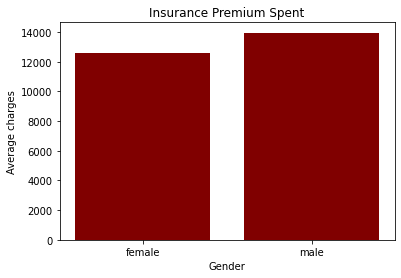

In [13]:
plt.bar(df.groupby('sex').mean().reset_index()['sex'],df.groupby('sex').mean().reset_index()['charges'],color='maroon')
plt.xlabel('Gender')
plt.ylabel('Average charges')
plt.title('Insurance Premium Spent')
plt.show()

Observation - Male and female have slightly equal premium charges which means that there is no affect of gender on premium charges.

### 2. Does being a smoker is affecting the premium charge ?

In [14]:
df.groupby('smoker').mean().reset_index()

smoker        age        bmi  children       charges
0     no  39.385338  30.651795  1.090226   8434.268298
1    yes  38.514599  30.708449  1.113139  32050.231832

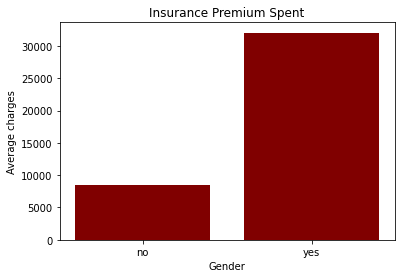

In [15]:
plt.bar(df.groupby('smoker').mean().reset_index()['smoker'],df.groupby('smoker').mean().reset_index()['charges'],color='maroon')
plt.xlabel('Gender')
plt.ylabel('Average charges')
plt.title('Insurance Premium Spent')
plt.show()

Observation - Being smoker has so much more premium charges than being non smoker so being smoker is affecting the premium charges.

### 3. How age is affecting premium charges ?

In [16]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [17]:
df.groupby('age').mean().reset_index()

age        bmi  children       charges
0    18  31.326159  0.449275   7086.217556
1    19  28.596912  0.426471   9747.909335
2    20  30.632759  0.862069  10159.697736
3    21  28.185714  0.785714   4730.464330
4    22  31.087679  0.714286  10012.932802
5    23  31.454464  1.000000  12419.820040
6    24  29.142679  0.464286  10648.015962
7    25  29.693929  1.285714   9838.365311
8    26  29.428929  1.071429   6133.825309
9    27  29.333571  0.964286  12184.701721
10   28  29.482143  1.285714   9069.187564
11   29  29.383148  1.259259  10430.158727
12   30  30.557593  1.555556  12719.110358
13   31  29.918333  1.407407  10196.980573
14   32  31.597692  1.269231   9220.300291
15   33  31.163077  1.538462  12351.532987
16   34  30.274038  1.153846  11613.528121
17   35  31.394800  1.680000  11307.182031
18   36  29.374200  1.240000  12204.476138
19   37  31.216600  1.520000  18019.911877
20   38  28.996600  1.480000   8102.733674
21   39  29.910200  2.200000  11778.242945
22   40  30.139074  1.592593  11772.251310
23   41  31.506852  1.407407   9653.745650
24   42  30.328148  1.000000  13061.038669
25   43  30.204444  1.629630  19267.278653
26   44  30.844259  1.222222  15859.396587
27   45  29.778966  1.482759  14830.199856
28   46  31.340862  1.620690  14342.590639
29   47  30.664310  1.379310  17653.999593
30   48  31.925690  1.310345  14632.500445
31   49  30.313929  1.500000  12696.006264
32   50  31.132241  1.310345  15663.003301
33   51  31.727069  1.103448  15682.255867
34   52  32.936034  1.482759  18256.269719
35   53  30.360893  1.250000  16020.930755
36   54  31.234286  1.428571  18758.546475
37   55  31.950000  0.961538  16164.545488
38   56  31.600962  0.769231  15025.515837
39   57  30.844423  0.615385  16447.185250
40   58  32.718200  0.240000  13878.928112
41   59  30.572000  1.200000  18895.869532
42   60  30.332826  0.347826  21979.418507
43   61  32.548261  0.739130  22024.457609
44   62  32.342609  0.565217  19163.856573
45   63  31.923478  0.565217  19884.998461
46   64  32.976136  0.772727  23275.530837

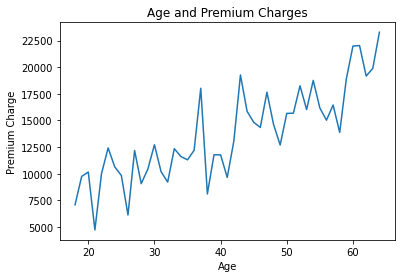

In [18]:
fig, ax = plt.subplots()

# Plot the data as a line chart
ax.plot(df.groupby('age').mean().reset_index()['age'], df.groupby('age').mean().reset_index()['charges'])

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Premium Charge')
ax.set_title('Age and Premium Charges')

# Show the plot
plt.show()

Observation - We can't say any specific effect of age on charges but we can say that as age is increasing the trend of charge is also increased.

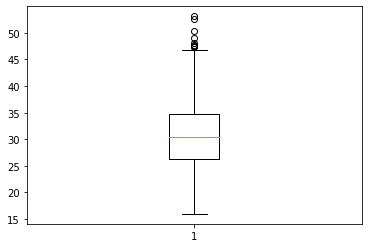

<Figure size 1440x1080 with 0 Axes>

In [19]:
# Checking for outliers in BMI
plt.boxplot(df['bmi'])
fig = plt.figure(figsize =(20, 15))
plt.show()

There are some outliers are present .

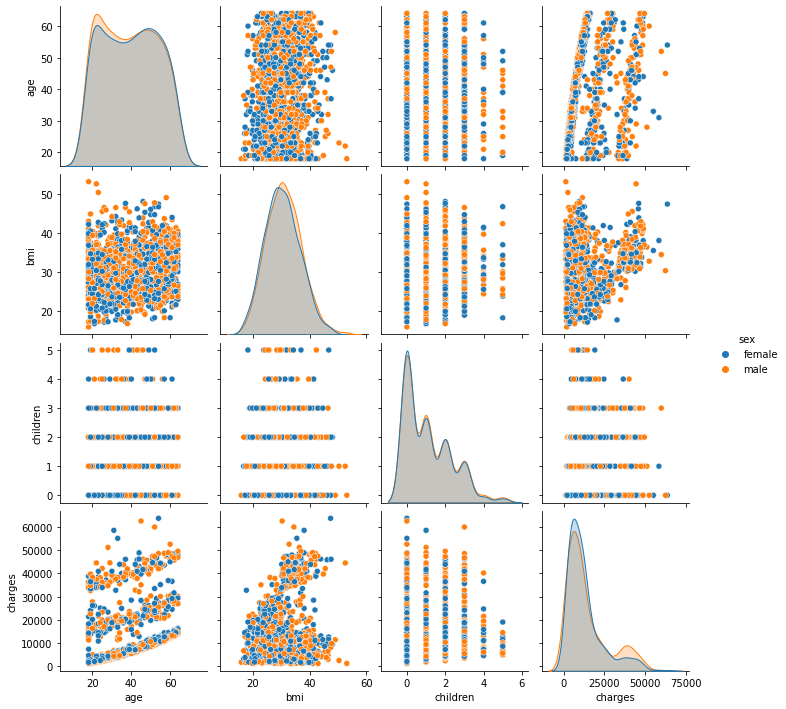

In [20]:
# Effect of sex on other features
sns.pairplot(df, hue = 'sex') 

## Feature Engineering and Selection

### Converting all the categorical features into numerical features

In [21]:
for i in df.columns:
    print("Column_name = {} , DataType = {}".format(i,df[i].dtype))

Column_name = age , DataType = int64
Column_name = sex , DataType = object
Column_name = bmi , DataType = float64
Column_name = children , DataType = int64
Column_name = smoker , DataType = object
Column_name = region , DataType = object
Column_name = charges , DataType = float64


In [22]:
# Sex
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [23]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [24]:
df.head()

age  sex     bmi  children smoker     region      charges
0   19    0  27.900         0    yes  southwest  16884.92400
1   18    1  33.770         1     no  southeast   1725.55230
2   28    1  33.000         3     no  southeast   4449.46200
3   33    1  22.705         0     no  northwest  21984.47061
4   32    1  28.880         0     no  northwest   3866.85520

In [25]:
#smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [26]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [27]:
df.head()

age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520

In [28]:
#region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [29]:
df_region=pd.get_dummies(df['region'])

In [30]:
df_region

northeast  northwest  southeast  southwest
0             0          0          0          1
1             0          0          1          0
2             0          0          1          0
3             0          1          0          0
4             0          1          0          0
...         ...        ...        ...        ...
1333          0          1          0          0
1334          1          0          0          0
1335          0          0          1          0
1336          0          0          0          1
1337          0          1          0          0

[1338 rows x 4 columns]

In [31]:
df=pd.concat([df,df_region],axis=1)

In [32]:
df.head()

age  sex     bmi  children  smoker     region      charges  northeast  \
0   19    0  27.900         0       1  southwest  16884.92400          0   
1   18    1  33.770         1       0  southeast   1725.55230          0   
2   28    1  33.000         3       0  southeast   4449.46200          0   
3   33    1  22.705         0       0  northwest  21984.47061          0   
4   32    1  28.880         0       0  northwest   3866.85520          0   

   northwest  southeast  southwest  
0          0          0          1  
1          0          1          0  
2          0          1          0  
3          1          0          0  
4          1          0          0

In [33]:
df.drop('region',axis=1,inplace=True)

In [34]:
df.head()

age  sex     bmi  children  smoker      charges  northeast  northwest  \
0   19    0  27.900         0       1  16884.92400          0          0   
1   18    1  33.770         1       0   1725.55230          0          0   
2   28    1  33.000         3       0   4449.46200          0          0   
3   33    1  22.705         0       0  21984.47061          0          1   
4   32    1  28.880         0       0   3866.85520          0          1   

   southeast  southwest  
0          0          1  
1          1          0  
2          1          0  
3          0          0  
4          0          0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [36]:
df['northwest'] = df['northwest'].astype(int)
df['southeast'] = df['southeast'].astype(int)
df['southwest'] = df['southwest'].astype(int)
df['northeast'] = df['northeast'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int32  
 7   northwest  1338 non-null   int32  
 8   southeast  1338 non-null   int32  
 9   southwest  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.8 KB


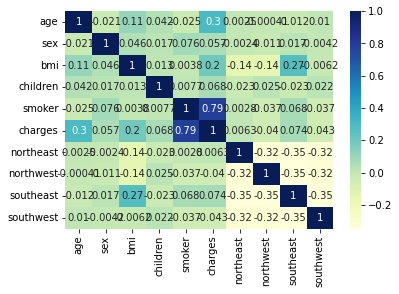

In [38]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [39]:
X = df.drop('charges',axis=1)
y = df.charges

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

## Model Training and Testing

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from xgboost import XGBRFRegressor

In [42]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_regressor',LinearRegression())])

In [43]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('dt_regressor',DecisionTreeRegressor())])

In [44]:
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     ('dt_regressor',RandomForestRegressor())])

In [45]:
pipeline_xg=Pipeline([('scalar4',StandardScaler()),
                     ('dt_regressor',XGBRFRegressor())])

In [46]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_xg]

In [47]:
pipe_dict = {0: 'Linear Regression', 1: 'Decision Tree', 2: 'Random Forest', 3:'XG Boost'}

In [48]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [49]:
for i,model in enumerate(pipelines):
    print("{} r2 score: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Linear Regression r2 score: 0.709958033808566
Decision Tree r2 score: 0.7093478442740444
Random Forest r2 score: 0.8207651054422408
XG Boost r2 score: 0.8324225714454258


In [50]:
y_pred = pipeline_xg.predict(X_test)

In [51]:
y_pred

array([ 8725.08  ,  3668.7092, 20085.758 ,  7273.637 ,  2220.0872,
        4863.29  ,  5057.3115, 14196.867 ,  9745.046 , 41438.734 ,
       11358.153 ,  9995.794 , 13023.923 ,  8107.9937,  6598.124 ,
       10754.543 ,  6694.258 , 12711.481 ,  4997.027 , 10989.921 ,
        7242.2075,  7264.186 , 15634.585 , 11727.275 , 35877.992 ,
        2278.5278, 14269.94  ,  9899.224 , 11163.382 , 12628.137 ,
        6509.551 ,  4147.5654, 25422.014 , 44672.68  ,  6830.681 ,
        5253.499 ,  6733.738 , 11195.937 ,  7301.292 , 48052.598 ,
        2582.3171,  6442.8857, 14101.35  , 23709.984 ,  2689.685 ,
        5762.4644,  6871.1895, 20315.92  , 13944.535 ,  7785.4746,
       14858.513 , 40070.703 ,  9004.676 , 24473.299 , 16081.868 ,
        7591.291 ,  3695.5195, 13349.234 , 10087.365 , 14424.501 ,
       13438.063 ,  7167.784 , 35517.035 , 24940.053 ,  2648.8071,
        5441.427 ,  4649.9995, 40241.82  , 14230.93  ,  8550.757 ,
        7748.799 , 11138.114 ,  3356.2446, 11463.893 , 44755.6

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute error : ",mae)

mse = mean_squared_error(y_test,y_pred)
print("Mean squared error : ",mse)

r2 = r2_score(y_test,y_pred)
print("R-squared:", r2)

Mean Absolute error :  2674.6792309226335
Mean squared error :  24133063.58747588
R-squared: 0.8324225714454258


## Prediction 

In [53]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [54]:
def predict_charges(age,sex,bmi,children,smoker,region):
    loc_index = np.where(X.columns==region)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = bmi
    x[3] = children
    x[4] = smoker
    if loc_index >= 0:
        x[loc_index] = 1
        
    return pipeline_xg.predict([x])[0]

In [55]:
predict_charges(28,1,33.000,3,0,'southeast')

5856.439

In [56]:
predict_charges(60,0,25.84,0,0,'northwest')

14656.931

In [57]:
predict_charges(60,0,25.84,0,0,'northwest')

14656.931

In [58]:
predict_charges(22,1,35.6,0,1,'southwest')

36585.02

In [59]:
predict_charges(18,0,26.315,0,0,'northeast')

2686.1282

In [60]:
predict_charges(21,0,25.8,0,0,'southwest')

2290.916

### Exporting model to pickle file 

In [61]:
import pickle

In [62]:
with open('insurance_charges_prediction_model.pickle','wb') as f:
    pickle.dump(pipeline_xg,f)

### Exporting column information into json file 

In [63]:
import json
columns = {
    'region' : [col.lower() for col in X.columns[5:]]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [64]:
X.columns[5:]

Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object')

In [65]:
all_columns = {
    'region' : [col.lower() for col in X.columns]
}
with open("all_columns.json","w") as f:
    f.write(json.dumps(all_columns))